# Exercise A8.3 (c)

This notebook considers a Markowitz portfolio optimization problem of the form
\begin{align*}
    \begin{array}{ll}
    \text{minimize} &  x^T \Sigma x \\
    \text{subject to} & \mu^T x \geq R, \ \mathbf{1}^Tx = 1, \ x \succeq 0,
    \end{array}
\end{align*}
with variable $x \in \mathbb{R}^n$ and data $\Sigma \in \mathbb{S}_{++}^n$, $\mu \in \mathbb{R}^n$, and $R \in \mathbb{R}$.

We start by importing the necessary libraries and setting up a function that uses CVXPY to solve the problem.

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

def markowitz_portfolio(mu, Sigma, R):

    n = len(mu)
    x = cp.Variable(n)
    objective = cp.Minimize(cp.quad_form(x, Sigma))
    constraints = [
        mu@x >= R,              # Expected return constraint
        cp.sum(x) == 1,         # Budget constraint
        x >= 0                  # No short-selling
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    pstar = problem.value       # Optimal portfolio risk
    x_opt = x.value             # Optimal asset weights

    return pstar, x_opt

ModuleNotFoundError: No module named 'cvxpy'

Next, we define the problem data, solve the portfolio optimization problem for different values of $R$, and plot the optimal value (the variance) as a function of $R$.

In [ ]:
mu = np.array([0.26127583, 0.41963356, 0.3205384 , 0.24810782, 0.18511791])
Sigma = np.array([
        [0.0470292 , 0.02285076, 0.02407675, 0.02261967, 0.04502856],
        [0.02285076, 0.0838117 , 0.04583831, 0.03828422, 0.05775022],
        [0.02407675, 0.04583831, 0.07970722, 0.0301011 , 0.05146588],
        [0.02261967, 0.03828422, 0.0301011 , 0.0484953 , 0.03720466],
        [0.04502856, 0.05775022, 0.05146588, 0.03720466, 0.322828  ]])

Rmin = np.min(mu)
Rmax = np.max(mu)
Rvals = np.linspace(Rmin, Rmax, 45)
OptVal = np.zeros(len(Rvals))
OptAlloc = []
for k,R in enumerate(Rvals):
    pstar, x_opt = markowitz_portfolio(mu, Sigma, R)
    OptVal[k] = pstar
    OptAlloc.append(x_opt)

NameError: name 'np' is not defined

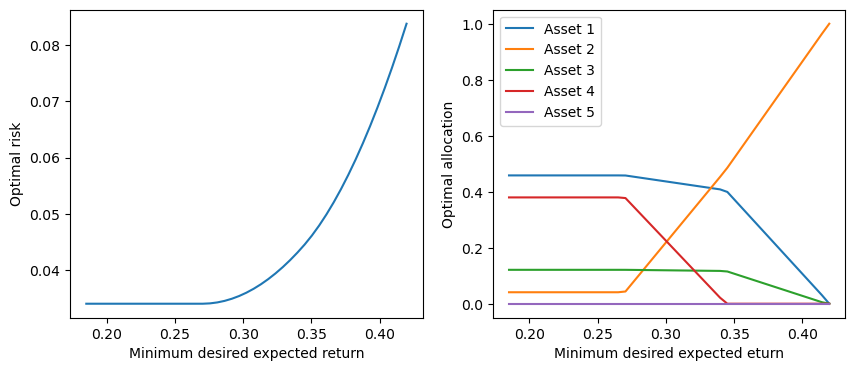

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Rvals, OptVal)
plt.xlabel('Minimum desired expected return')
plt.ylabel('Optimal risk')

plt.subplot(1,2,2)
plt.plot(Rvals, OptAlloc)
plt.xlabel('Minimum desired expected eturn')
plt.ylabel('Optimal allocation')
plt.legend(['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5'])